# Análise e Tratamento de Dados para Dashboard
---
Este notebook contém o processo completo de tratamento e preparação de dados para criação de um dashboard.

**Objetivo:** Analisar como os fatores socioeconômicos afetam a taxa de mortalidade por doenças isquêmicas do coração.

Autor: João Vitor Givisiez Lessa

## 1. Carregamento e Agrupamento dos Dados
---
Nesta seção, vamos carregar os dados que serão analisados.

**Descrição:** Os dados incluem informações sobre mortalidade, população, PIB, tabagismo, IDH, índice de Gini e leitos hospitalares.

In [1]:
import pandas as pd
import os
from IPython.display import display 
import re 

caminho_base = r"C:\Users\joaog\OneDrive\Área de Trabalho\dados"
print(f"Usando o caminho base: {caminho_base}\n")

files_paths_mortes = [
    os.path.join(caminho_base, "mortes_2016 - Página1.csv"),
    os.path.join(caminho_base, "mortes_2017 - Página1.csv"),
    os.path.join(caminho_base, "mortes_2018 - Página1.csv")
]
dataframes_mortes = []

for file_path in files_paths_mortes:
    if not os.path.exists(file_path):
        print(f"Aviso: O arquivo {file_path} não foi encontrado. Pulando...")
        continue
    
    year_row = pd.read_csv(file_path, header=None, nrows=1)
    year = int(str(year_row.iloc[0, 0]).strip())
    
    df = pd.read_csv(file_path, header=1)
    df['ano'] = year
    dataframes_mortes.append(df)

if not dataframes_mortes:
    raise Exception("Nenhum arquivo de mortes foi carregado. Verifique os caminhos.")
    
df_mortes_dic = pd.concat(dataframes_mortes, ignore_index=True)
df_populacao = pd.read_csv(
    os.path.join(caminho_base, "populaçao br - Página1.csv"),
    skiprows=1, thousands='.'
)

df_pib = pd.read_csv(
    os.path.join(caminho_base, "pib em % - Página1 (2).csv"),
    skiprows=1, decimal=','
)

df_tabagismo = pd.read_csv(
    os.path.join(caminho_base, "tabagismo - Página1.csv"),
    skiprows=1, decimal=','
)

df_idh = pd.read_csv(
    os.path.join(caminho_base, "IDMH - Página1.csv"),
    skiprows=1, decimal=','
)

df_gini = pd.read_csv(
    os.path.join(caminho_base, "gini geral - Página1.csv"),
    skiprows=1, decimal=','
)

df_leitos = pd.read_csv(
    os.path.join(caminho_base, "leitos sus.csv"),
    skiprows=1
)

display(df_mortes_dic.head())
display(df_mortes_dic.tail())

Usando o caminho base: C:\Users\joaog\OneDrive\Área de Trabalho\dados



,Unidade da Federação,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total,ano
0,11 Rondônia,357,62,30,56,182,468,617,756,1043,1416,1589,1736,32,8344,2016
1,12 Acre,239,59,28,30,153,254,254,313,405,519,669,832,8,3763,2016
2,13 Amazonas,1225,253,121,140,535,1380,1282,1290,1936,2373,2750,3434,80,16799,2016
3,14 Roraima,210,55,17,26,67,185,157,191,242,330,297,375,5,2157,2016
4,15 Pará,2157,435,230,306,1259,3138,3044,3157,4182,5520,6602,8282,245,38557,2016


,Unidade da Federação,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total,ano
79,50 Mato Grosso do Sul,502,98,55,74,201,604,782,1226,2069,2987,3446,4547,9,16600,2018
80,51 Mato Grosso,713,147,75,81,306,959,1155,1541,2399,3249,3664,3878,38,18205,2018
81,52 Goiás,1234,212,100,156,756,1960,2311,3131,4748,6964,8148,9707,80,39507,2018
82,53 Distrito Federal,453,57,34,44,184,486,697,1036,1461,2016,2344,3336,9,12157,2018
83,Total,35864,5869,3072,4363,19102,51952,61151,88826,154401,229156,271919,388271,2773,1316719,2018


## 2. Tratamento de Dados
---
Nesta etapa, os dados carregados serão tratados e padronizados.

**Descrição:** O foco está na limpeza, padronização de colunas e preparação para análise.

In [2]:
if 'Idade ignorada' in df_mortes_dic.columns:
     df_mortes_dic = df_mortes_dic.drop(columns=['Idade ignorada'])

if 'Unidade da Federação' in df_mortes_dic.columns:
     df_mortes_dic = df_mortes_dic[~df_mortes_dic['Unidade da Federação'].str.contains("Total", na=False)]
     print("  > Tratamento: Linha 'Total' removida de 'df_mortes_dic'.")
else:
     df_mortes_dic = df_mortes_dic[~df_mortes_dic['Estado'].str.contains("Total", na=False)]
     print("  > Tratamento: Linha 'Total' removida de 'df_mortes_dic'.")

df_mortes_dic = df_mortes_dic.rename(columns={'Unidade da Federação': 'Estado'})
df_pib = df_pib.rename(columns={'Unidade da Federação': 'Estado'})
df_idh = df_idh.rename(columns={'Unidade da Federação': 'Estado'})
df_gini = df_gini.rename(columns={'Unidade da Federação': 'Estado'})


df_mortes_dic['Estado'] = df_mortes_dic['Estado'].str.replace(r'^\d+\s', '', regex=True)


df_populacao['Estado'] = df_populacao['Estado'].str.split(' (', n=1, regex=False).str[0]

df_mapa_leitos = df_leitos.dropna(subset=['Sigla', 'Estado'])
uf_to_estado_map = pd.Series(df_mapa_leitos['Estado'].values, index=df_mapa_leitos['Sigla']).to_dict()


df_tabagismo['UF'] = df_tabagismo['Capital'].str.extract(r'\((.*?)\)')
df_tabagismo['Estado'] = df_tabagismo['UF'].map(uf_to_estado_map)


if 'DF' in uf_to_estado_map:
     print(f"    - 'DF' mapeado para '{uf_to_estado_map['DF']}'")
else:
     
     uf_to_estado_map['DF'] = 'Distrito Federal'
     df_tabagismo['Estado'] = df_tabagismo['UF'].map(uf_to_estado_map)


display(df_mortes_dic)
display(df_tabagismo[['Capital', 'UF', 'Estado']].head())

  > Tratamento: Linha 'Total' removida de 'df_mortes_dic'.
    - 'DF' mapeado para 'Distrito Federal'


,Estado,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,ano
0,Rondônia,357,62,30,56,182,468,617,756,1043,1416,1589,1736,8344,2016
1,Acre,239,59,28,30,153,254,254,313,405,519,669,832,3763,2016
2,Amazonas,1225,253,121,140,535,1380,1282,1290,1936,2373,2750,3434,16799,2016
3,Roraima,210,55,17,26,67,185,157,191,242,330,297,375,2157,2016
4,Pará,2157,435,230,306,1259,3138,3044,3157,4182,5520,6602,8282,38557,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Rio Grande do Sul,1372,218,124,179,803,2278,2942,4674,9848,16624,20465,29018,88618,2018
79,Mato Grosso do Sul,502,98,55,74,201,604,782,1226,2069,2987,3446,4547,16600,2018
80,Mato Grosso,713,147,75,81,306,959,1155,1541,2399,3249,3664,3878,18205,2018
81,Goiás,1234,212,100,156,756,1960,2311,3131,4748,6964,8148,9707,39507,2018


,Capital,UF,Estado
0,Aracaju (SE),SE,Sergipe
1,Belém (PA),PA,Pará
2,Belo Horizonte (MG),MG,Minas Gerais
3,Boa Vista (RR),RR,Roraima
4,Brasília (DF),DF,Distrito Federal


## 3. Long de Atributos e Merge na tabela principal (dataset)
Aqui foram realizados os cortes nas tabelas de atributos, levando em conta o ano e o estado, apos foi ferito o macthing dos dados com merge.

In [ ]:
if df_mortes_dic is not None:
    
    def melt_e_formata_ano(df, id_vars, value_vars, value_name):
        df_long = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Ano_Str', value_name=value_name)
        df_long['ano'] = df_long['Ano_Str'].astype(str).str.extract(r'(\d{4})').astype(int)
        df_long = df_long.drop(columns=['Ano_Str'])
        return df_long

    df_pop_long = melt_e_formata_ano(df_populacao, 
                                        id_vars=['Estado'], 
                                        value_vars=['População (2016)', 'População (2017)', 'População (2018)'], 
                                        value_name='Populacao')
    # Melt df_pib
    df_pib_long = melt_e_formata_ano(df_pib, 
                                        id_vars=['Estado'], 
                                        value_vars=['2016', '2017', '2018'], 
                                        value_name='PIB_%')
    # Melt df_tabagismo
    df_tab_long = melt_e_formata_ano(df_tabagismo, 
                                        id_vars=['Estado'],
                                        value_vars=['% de fumantes (2016)', '% de fumantes (2017)', '% de fumantes (2018)'], 
                                        value_name='%_Fumantes')
    # Melt df_idh
    df_idh_long = melt_e_formata_ano(df_idh, 
                                        id_vars=['Estado'], 
                                        value_vars=['IDHM (2016)', 'IDHM (2017)', 'IDHM (2018)'], 
                                        value_name='IDHM')
    # Melt df_gini
    df_gini_long = melt_e_formata_ano(df_gini, 
                                        id_vars=['Estado'], 
                                        value_vars=['2016', '2017', '2018'], 
                                        value_name='Gini')
    # Melt df_leitos
    df_leitos_long = melt_e_formata_ano(df_leitos, 
                                        id_vars=['Estado'], 
                                        value_vars=['2016', '2017', '2018'], 
                                        value_name='Leitos_SUS|10k')
    
    df_final = df_mortes_dic.copy()
    dfs_to_merge = [
        df_pop_long, 
        df_pib_long, 
        df_tab_long, 
        df_idh_long, 
        df_gini_long, 
        df_leitos_long
    ]
    
    for df_to_merge in dfs_to_merge:
        df_final = pd.merge(
            df_final, 
            df_to_merge, 
            on=['Estado', 'ano'],  
            how='left'
        )

    if 'Total' in df_final.columns and 'Populacao' in df_final.columns:
        df_final['Taxa_Mortes_Isquemicas_Total_por_100k'] = (df_final['Total'] / df_final['Populacao']) * 100000
    else:
        print("Colunas 'Total' ou 'Populacao' ausentes no df_final!")
    
    colunas_adultos_idosos = ['40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 anos e mais']
    if all(col in df_final.columns for col in colunas_adultos_idosos):
        df_final['Mortes_Isquemicas_Adultos_Idosos'] = df_final[colunas_adultos_idosos].sum(axis=1)
        df_final['Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k'] = (df_final['Mortes_Isquemicas_Adultos_Idosos'] / df_final['Populacao']) * 100000
    
    if 'Menor 1 ano' in df_final.columns:
        df_final['Taxa_Mortes_Isquemicas_Infantil_por_100k'] = (df_final['Menor 1 ano'] / df_final['Populacao']) * 100000
    
    display(df_final)
    df_final.info()
    caminho_saida = os.path.join(caminho_base, "dataset_final.csv")
    df_final.to_csv(caminho_saida, index=False, sep=';', decimal=',')
    print(f"\nSucesso! DataFrame final salvo em:\n{caminho_saida}")

,Estado,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,...,Populacao,PIB_%,%_Fumantes,IDHM,Gini,Leitos_SUS|10k,Taxa_Mortes_Isquemicas_Total_por_100k,Mortes_Isquemicas_Adultos_Idosos,Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k,Taxa_Mortes_Isquemicas_Infantil_por_100k
0,Rondônia,357,62,30,56,182,468,617,756,1043,...,1787279,-4.2,13.8,0.741,0.505,18.875153,466.854923,6540,365.919367,19.974498
1,Acre,239,59,28,30,153,254,254,313,405,...,816687,-2.4,13.6,0.721,0.551,14.909705,460.764038,2738,335.256959,29.264577
2,Amazonas,1225,253,121,140,535,1380,1282,1290,1936,...,4001667,-6.8,10.6,0.724,0.593,12.454125,419.800048,11783,294.452287,30.612242
3,Roraima,210,55,17,26,67,185,157,191,242,...,519866,0.2,14.2,0.742,0.508,15.723420,414.914613,1435,276.032670,40.395025
4,Pará,2157,435,230,306,1259,3138,3044,3157,4182,...,8272724,-4.0,12.1,0.668,0.578,13.120806,466.073811,27743,335.355078,26.073637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Rio Grande do Sul,1372,218,124,179,803,2278,2942,4674,9848,...,11377239,1.8,12.4,0.775,0.480,18.424885,778.906025,80629,708.686879,12.059165
77,Mato Grosso do Sul,502,98,55,74,201,604,782,1226,2069,...,2748023,3.3,11.6,0.755,0.496,12.974479,604.070636,14275,519.464357,18.267678
78,Mato Grosso,713,147,75,81,306,959,1155,1541,2399,...,3441745,13.0,10.9,0.752,0.517,15.338475,528.946799,14731,428.009629,20.716236
79,Goiás,1234,212,100,156,756,1960,2311,3131,4748,...,6921161,2.7,9.8,0.779,0.519,15.524315,570.814636,32698,472.435188,17.829379


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Estado                                          81 non-null     object 
 1   Menor 1 ano                                     81 non-null     int64  
 2   1 a 4 anos                                      81 non-null     int64  
 3   5 a 9 anos                                      81 non-null     int64  
 4   10 a 14 anos                                    81 non-null     int64  
 5   15 a 19 anos                                    81 non-null     int64  
 6   20 a 29 anos                                    81 non-null     int64  
 7   30 a 39 anos                                    81 non-null     int64  
 8   40 a 49 anos                                    81 non-null     int64  
 9   50 a 59 anos                                 

## 4. Montagem do Dashboard
---
Objetivo: reunir os dados tratados em um conjunto de visualizações interativas que permitam explorar como fatores socioeconômicos (PIB, tabagismo, IDHM, Gini, leitos SUS) se relacionam com as taxas de mortalidade por doenças isquêmicas do coração (2016–2018).

Conteúdo desta etapa:
- Fonte dos dados: `df_final` (resultado dos passos de carregamento, limpeza, *melt* e *merge*).
- Métricas criadas:  
    - Taxa_Mortes_Isquemicas_Total_por_100k (principal)  
    - Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k  
    - Taxa_Mortes_Isquemicas_Infantil_por_100k
- Análise realizada: matriz de correlação entre taxas de mortalidade e atributos; heatmap salvo em `heatmap_correlacao_mortes_isquemicas.png`.

  > Taxas de mortes isquêmicas (Total, Adultos/Idosos, Infantil) por 100k calculadas.


,Taxa Morte Isquêmica (Total),Taxa Morte Isquêmica (Adulto/Idoso),Taxa Morte Isquêmica (Infantil),PIB_%,%_Fumantes,IDHM,Gini,Leitos_SUS|10k
Taxa Morte Isquêmica (Total),1.000000,0.984117,-0.622811,-0.169292,0.000873,0.046734,-0.302727,0.243914
Taxa Morte Isquêmica (Adulto/Idoso),0.984117,1.000000,-0.727711,-0.143246,0.050244,0.164417,-0.388367,0.244065
Taxa Morte Isquêmica (Infantil),-0.622811,-0.727711,1.000000,0.109836,-0.044722,-0.337420,0.516145,-0.190397
PIB_%,-0.169292,-0.143246,0.109836,1.000000,-0.201246,0.042054,-0.076351,0.141604
%_Fumantes,0.000873,0.050244,-0.044722,-0.201246,1.000000,0.662117,-0.542497,-0.116291
IDHM,0.046734,0.164417,-0.337420,0.042054,0.662117,1.000000,-0.546672,-0.211364
Gini,-0.302727,-0.388367,0.516145,-0.076351,-0.542497,-0.546672,1.000000,-0.180779
Leitos_SUS|10k,0.243914,0.244065,-0.190397,0.141604,-0.116291,-0.211364,-0.180779,1.000000



Sucesso! Heatmap atualizado salvo em:
C:\Users\joaog\OneDrive\Área de Trabalho\dados\heatmap_correlacao_mortes_isquemicas.png
Observe a imagem 'heatmap_correlacao_mortes_isquemicas.png' na sua pasta para ver os resultados.


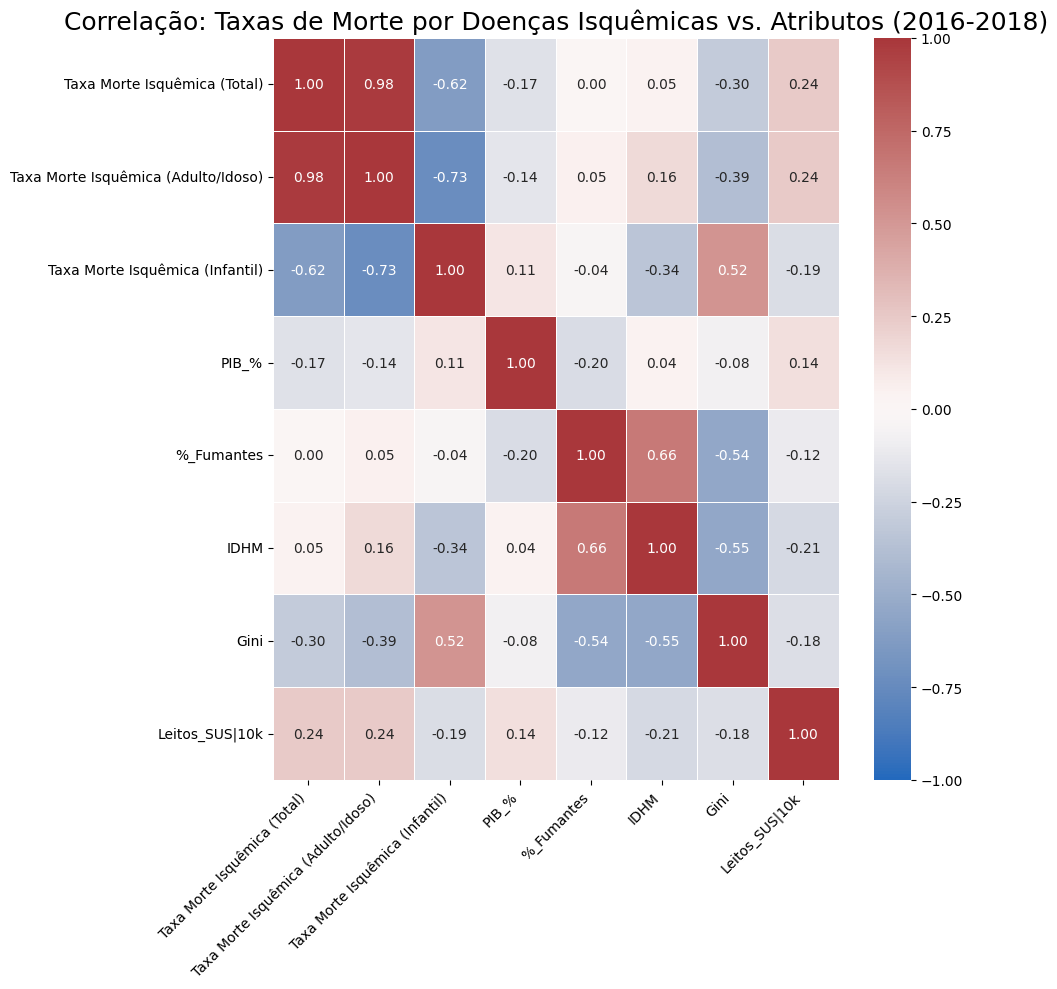

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display 

caminho_base = r"C:\Users\joaog\OneDrive\Área de Trabalho\dados"
caminho_dataset_final = os.path.join(caminho_base, "dataset_final.csv")

df_final = pd.read_csv(caminho_dataset_final, sep=';', decimal=',')

colunas_necessarias = ['Total', 'Populacao']
for coluna in colunas_necessarias:
    if coluna not in df_final.columns:
        raise KeyError(f"A coluna '{coluna}' está ausente no DataFrame. Verifique os dados de entrada.")
    if df_final[coluna].isnull().any():
        raise ValueError(f"A coluna '{coluna}' contém valores nulos. Verifique os dados de entrada.")

df_final['Taxa_Mortes_Isquemicas_Total_por_100k'] = \
    (df_final['Total'] / df_final['Populacao']) * 100000
    
colunas_adultos_idosos = [
    '40 a 49 anos', '50 a 59 anos', 
    '60 a 69 anos', '70 a 79 anos', '80 anos e mais'
]
df_final['Mortes_Isquemicas_Adultos_Idosos'] = df_final[colunas_adultos_idosos].sum(axis=1)

df_final['Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k'] = \
    (df_final['Mortes_Isquemicas_Adultos_Idosos'] / df_final['Populacao']) * 100000
    
df_final['Taxa_Mortes_Isquemicas_Infantil_por_100k'] = \
    (df_final['Menor 1 ano'] / df_final['Populacao']) * 100000

print("  > Taxas de mortes isquêmicas (Total, Adultos/Idosos, Infantil) por 100k calculadas.")

colunas_para_analise = [
    
    'Taxa_Mortes_Isquemicas_Total_por_100k',
    'Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k',
    'Taxa_Mortes_Isquemicas_Infantil_por_100k',

    'PIB_%',
    '%_Fumantes',
    'IDHM',
    'Gini',
    'Leitos_SUS|10k'
]
df_analise = df_final[colunas_para_analise].rename(columns={
    'Taxa_Mortes_Isquemicas_Total_por_100k': 'Taxa Morte Isquêmica (Total)',
    'Taxa_Mortes_Isquemicas_Adultos_Idosos_por_100k': 'Taxa Morte Isquêmica (Adulto/Idoso)',
    'Taxa_Mortes_Isquemicas_Infantil_por_100k': 'Taxa Morte Isquêmica (Infantil)',
    'PIB_Variacao_Pct': 'Variação PIB (%)',
    'Pct_Fumantes': '% Fumantes',
    'Leitos_SUS_por_10k': 'Leitos SUS (por 10k)'
})

corr_matrix = df_analise.corr()
display(corr_matrix)

plt.figure(figsize=(10, 10)) 

sns.heatmap(
    corr_matrix, 
    annot=True,     # Mostra os números (os valores) dentro de cada quadrado
    fmt='.2f',      # Formata os números para 2 casas decimais
    cmap='vlag',    # O esquema de cores (Vermelho-Negativo, Azul-Positivo)
    linewidths=.5,  # Linhas finas entre os quadrados
    vmin=-1, vmax=1 # Força a escala a ir de -1 a +1
)

plt.title('Correlação: Taxas de Morte por Doenças Isquêmicas vs. Atributos (2016-2018)', fontsize=18)

plt.xticks(rotation=45, ha='right') # Rotaciona os labels do eixo X
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta a imagem para não cortar os labels

# Salvar a imagem na sua pasta 'dados'
caminho_imagem = os.path.join(caminho_base, "heatmap_correlacao_mortes_isquemicas.png")
plt.savefig(caminho_imagem)

print(f"\nSucesso! Heatmap atualizado salvo em:\n{caminho_imagem}")
print("Observe a imagem 'heatmap_correlacao_mortes_isquemicas.png' na sua pasta para ver os resultados.")

## 5. Montagem de métricas e visualizaçao

Aqui geramos metricas que tambem podem ser analisada com essa analise de dados, como series temporais dos estados e sctter plot de alguns atributos


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display 

caminho_base = r"C:\Users\joaog\OneDrive\Área de Trabalho\dados"

caminho_dataset_com_taxas = os.path.join(caminho_base, "dataset_final.csv")

df_final = pd.read_csv(caminho_dataset_com_taxas, sep=';', decimal=',')
print(f"Sucesso! '{os.path.basename(caminho_dataset_com_taxas)}' carregado.\n")


print("Gerando Gráfico 1: Scatter Plot (Taxa vs % Fumantes)...")
sns.lmplot(
    data=df_final,
    x='%_Fumantes',
    y='Taxa_Mortes_Isquemicas_Total_por_100k',
    hue='ano',      
    height=7,
    aspect=1.5
)

plt.title('Taxa de Morte Isquêmica (por 100k) vs. % de Fumantes (2016-2018)', fontsize=14)
plt.xlabel('% de Fumantes na Capital')
plt.ylabel('Taxa de Morte Isquêmica (Total por 100k)')
plt.grid(True, linestyle='--', alpha=0.6)

# Salvar a imagem
caminho_img_scatter_fumantes = os.path.join(caminho_base, "scatter_plot_taxa_vs_fumantes.png")
plt.savefig(caminho_img_scatter_fumantes)
print(f"  > Gráfico salvo em: {caminho_img_scatter_fumantes}\n")
plt.clf()
sns.lmplot(
    data=df_final,
    x='IDHM',
    y='Taxa_Mortes_Isquemicas_Total_por_100k',
    hue='ano',
    height=7,
    aspect=1.5
)

plt.title('Taxa de Morte Isquêmica (por 100k) vs. IDHM (2016-2018)', fontsize=14)
plt.xlabel('Índice de Desenvolvimento Humano (IDHM)')
plt.ylabel('Taxa de Morte Isquêmica (Total por 100k)')
plt.grid(True, linestyle='--', alpha=0.6)

caminho_img_scatter_idhm = os.path.join(caminho_base, "scatter_plot_taxa_vs_idhm.png")
plt.savefig(caminho_img_scatter_idhm)
print(f"  > Gráfico salvo em: {caminho_img_scatter_idhm}\n")

plt.clf() # Limpa a figura

g = sns.relplot(
    data=df_final,
    x='ano',
    y='Taxa_Mortes_Isquemicas_Total_por_100k',
    col='Estado',   # Cria uma coluna para cada Estado
    col_wrap=5,     # Quebra a linha a cada 5 gráficos
    kind='line',    # Tipo de gráfico
    marker='o',     # Adiciona um ponto em cada ano
    height=2.5,
    aspect=1.5
)

g.fig.suptitle('Série Temporal da Taxa de Morte Isquêmica por Estado (2016-2018)', y=1.03, fontsize=16)
g.set_axis_labels("Ano", "Taxa de Morte (por 100k)")
g.set_titles("{col_name}") # Define o título de cada mini-gráfico
plt.xticks(ticks=[2016, 2017, 2018]) # Garante que todos os anos apareçam

# Salvar a imagem
caminho_img_series_temporal = os.path.join(caminho_base, "series_temporais_por_estado.png")
plt.savefig(caminho_img_series_temporal)
print(f"  > Gráfico salvo em: {caminho_img_series_temporal}\n")
plt.clf()

Sucesso! 'dataset_final.csv' carregado.

Gerando Gráfico 1: Scatter Plot (Taxa vs % Fumantes)...
  > Gráfico salvo em: C:\Users\joaog\OneDrive\Área de Trabalho\dados\scatter_plot_taxa_vs_fumantes.png

  > Gráfico salvo em: C:\Users\joaog\OneDrive\Área de Trabalho\dados\scatter_plot_taxa_vs_idhm.png

  > Gráfico salvo em: C:\Users\joaog\OneDrive\Área de Trabalho\dados\series_temporais_por_estado.png



<Figure size 1135.25x700 with 0 Axes>

<Figure size 1135.25x700 with 0 Axes>

<Figure size 1875x1500 with 0 Axes>